In [ ]:
# We want to first do exploratory analysis for the single-cell dataset. Some questions that we want to answer: 

# 1. How many cells do we have? 
# 2. How many clusters do we have? 
# 3. What is the distribution of cells per cluster? 
# 4. What are the genes that are enriched in each cluster? 

In [5]:
# Print current directory contents 
import os
os.chdir("/workspace/")
current_working_directory = os.getcwd()
print("Current Working Directory:", current_working_directory)

Current Working Directory: /workspace


In [6]:
import scanpy as sc 

In [7]:
# Read the single-cell RNA-seq data
adata = sc.read_h5ad('datasets/WT.h5ad')
adata

AnnData object with n_obs × n_vars = 6931 × 19788
    obs: 'consensuscall', 'n_genes', 'leiden', 'leiden_res0_25', 'leiden_res0_5', 'leiden_res0_75', 'leiden_res1', 'ps_ordered', 'dpt_pseudotime', 'subcluster', 'text_label', 'newclust'
    var: 'gene_ids', 'feature_types', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'dendrogram_consensuscall', 'dendrogram_leiden_res0_75', 'dendrogram_ps_ordered', 'hvg', 'leiden', 'leiden_colors', 'leiden_res0_25', 'leiden_res0_25_colors', 'leiden_res0_5', 'leiden_res0_5_colors', 'leiden_res0_75', 'leiden_res0_75_colors', 'leiden_res1', 'leiden_res1_colors', 'log1p', 'neighbors', 'newclust_colors', 'pca', 'ps_ordered_colors', 'subcluster_colors', 't-test', 'text_label_colors', 'umap'
    obsm: 'X_pca', 'X_umap', 'aucell_estimate'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

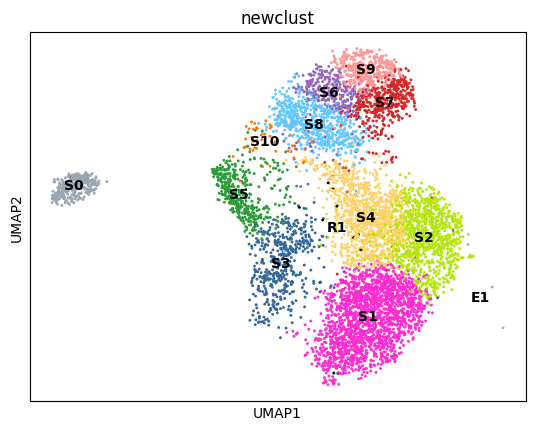

In [8]:
# Plot a UMAP of the data
sc.pl.umap(adata, color='newclust', legend_loc='on data')

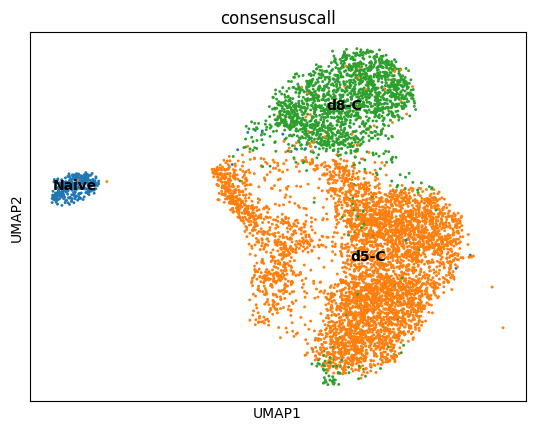

In [9]:
# Plot a UMAP of the data
sc.pl.umap(adata, color='consensuscall', legend_loc='on data')

In [10]:
import pandas as pd
pd.crosstab(adata.obs['newclust'], adata.obs['consensuscall'])

consensuscall,Naive,d5-C,d8-C
newclust,,,
E1,0,4,0
R1,0,14,0
S0,325,3,0
S1,0,1790,63
S2,2,982,17
S3,0,467,1
S4,1,1033,27
S5,5,417,0
S6,4,44,271


In [9]:
# Filter out cells that have 'newclust' equal to 'E1' or 'R1'
adata = adata[~adata.obs['newclust'].isin(['E1', 'R1'])]

/opt/conda/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:645: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


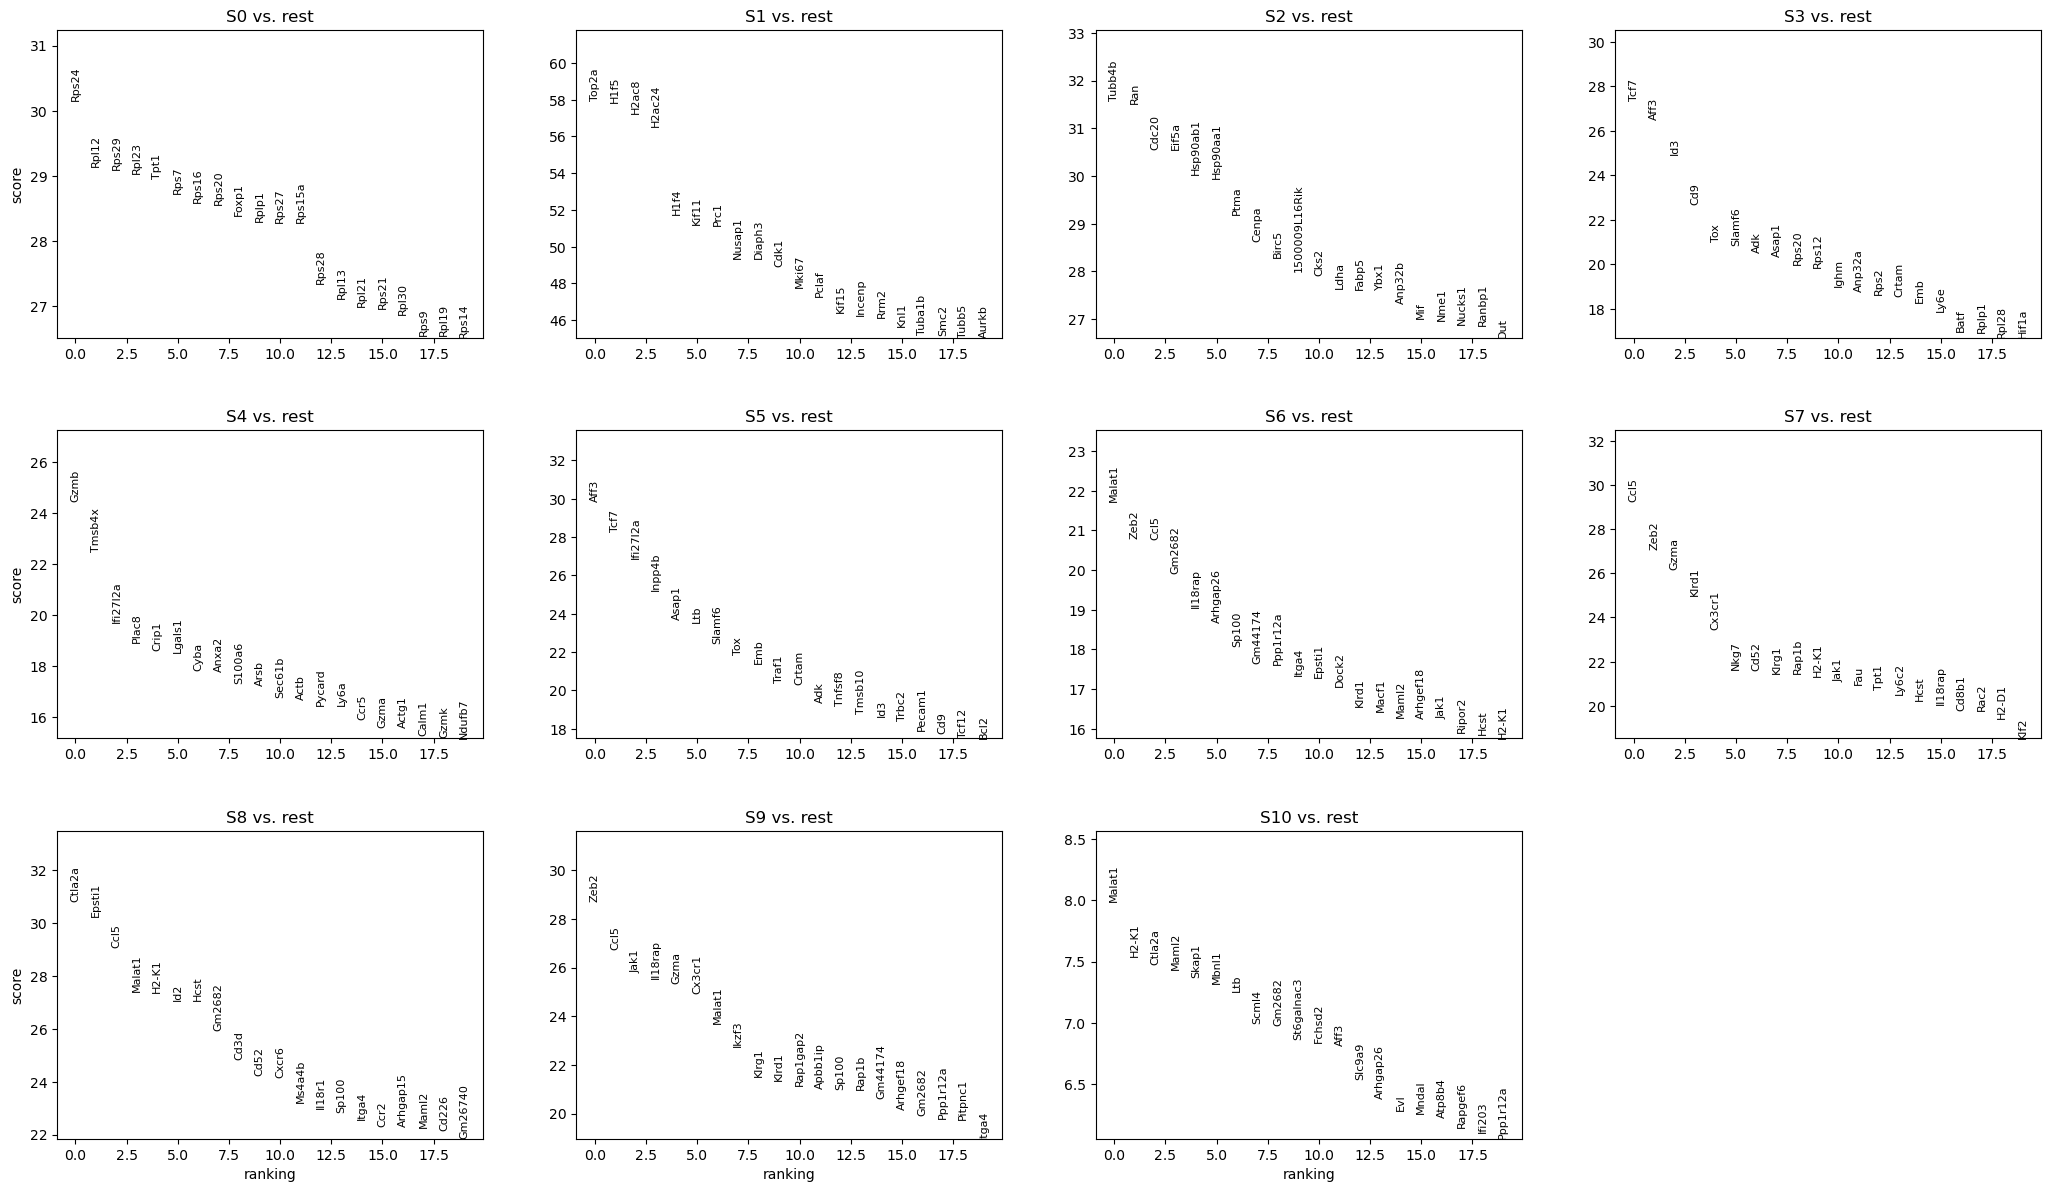

In [10]:
# Show identified marker genes using wilcoxon rank-sum test
sc.tl.rank_genes_groups(adata, 'newclust', method='wilcoxon')
sc.pl.rank_genes_groups(adata, n_genes=20, sharey=False)

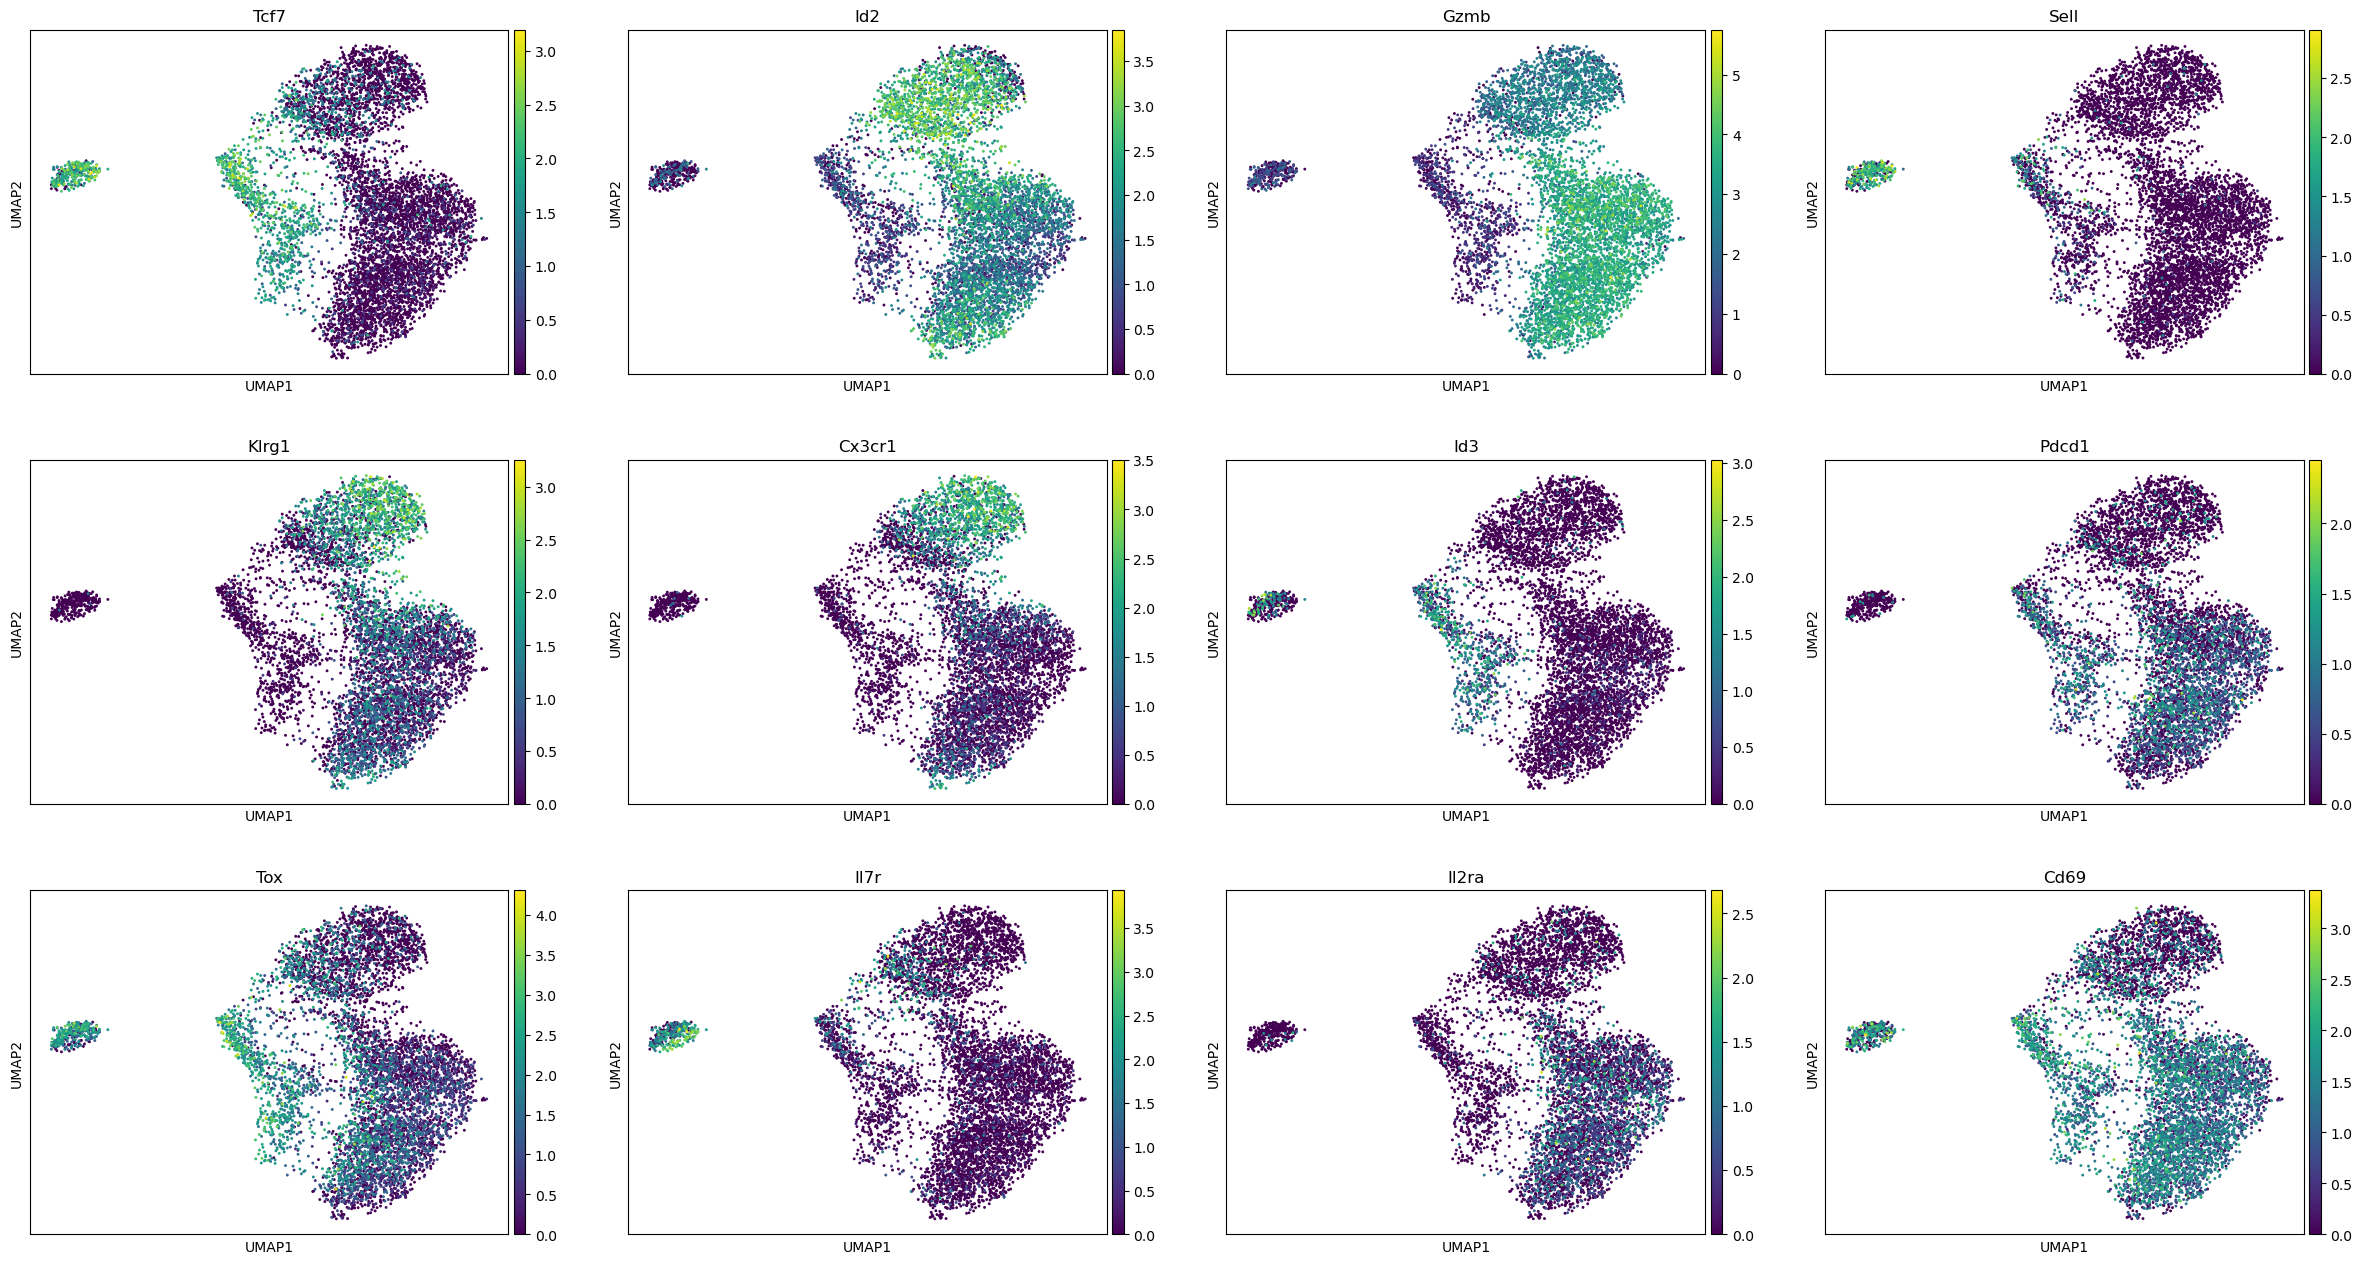

In [19]:
# Color cells by expression of 'Tcf7', 'Id2', and 'Gzmb'
sc.pl.umap(adata, color=['Tcf7', 'Id2', 'Gzmb', 'Sell', 'Klrg1', 'Cx3cr1', 'Id3', 'Pdcd1', 'Tox', 'Il7r', 'Il2ra', 'Cd69'])